# Importimg Dataframe

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(r"D:\ML-Data-Sets\train.csv")
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [4]:
df.shape

(59598, 24)

# Handeling Null Value

In [5]:
df.isnull().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

# Encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
for column in ['Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 
               'Innovation Opportunities', 'Company Reputation', 'Employee Recognition', 
               'Attrition', 'Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction', 
               'Performance Rating', 'Overtime', 'Marital Status', 'Education Level']:
    df[column] = LabelEncoder().fit_transform(df[column])


In [8]:
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,0,5390,0,2,0,2,...,0,1,1,89,0,0,0,0,2,1
1,64756,59,0,4,3,5534,3,0,3,3,...,3,1,1,21,0,0,0,1,1,1
2,30257,24,0,10,2,8159,2,0,3,0,...,3,1,1,74,0,0,0,3,1,1
3,65791,36,0,7,0,3989,2,0,2,1,...,2,1,2,50,1,0,0,2,2,1
4,65026,56,1,41,0,4821,1,3,0,0,...,0,2,1,68,0,0,0,1,2,1


# Splitting DataFrame into x and y

In [9]:
x = df.drop(['Attrition'],axis=1)
x.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition
0,8410,31,1,19,0,5390,0,2,0,2,...,1,0,1,1,89,0,0,0,0,2
1,64756,59,0,4,3,5534,3,0,3,3,...,0,3,1,1,21,0,0,0,1,1
2,30257,24,0,10,2,8159,2,0,3,0,...,1,3,1,1,74,0,0,0,3,1
3,65791,36,0,7,0,3989,2,0,2,1,...,2,2,1,2,50,1,0,0,2,2
4,65026,56,1,41,0,4821,1,3,0,0,...,0,0,2,1,68,0,0,0,1,2


In [10]:
y = df['Attrition']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int32

# Initialize the classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, balanced_accuracy_score,
    matthews_corrcoef, log_loss
)
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

models = {
    "SVC": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=1),
    "Logistic Regression": LogisticRegression(random_state=1, max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=1)
}


In [16]:
skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

results = {}
for model_name, model in models.items():
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    specificities = []
    aucs = []
    balanced_accuracies = []
    mccs = []
    log_losses = []
    
    for train_index, test_index in skf.split(x_scaled, y):
        x_train, x_test = x_scaled[train_index], x_scaled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        y_proba = model.predict_proba(x_test)[:, 1]

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1]) if (cm[0, 0] + cm[0, 1]) > 0 else 0
        specificities.append(specificity)
        aucs.append(roc_auc_score(y_test, y_proba))
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        mccs.append(matthews_corrcoef(y_test, y_pred))
        log_losses.append(log_loss(y_test, y_proba))
        
    results[model_name] = {
        "Accuracy": np.mean(accuracies),
        "Precision": np.mean(precisions),
        "Recall": np.mean(recalls),
        "F1 Score": np.mean(f1_scores),
        "Specificity": np.mean(specificities),
        "AUC": np.mean(aucs),
        "Balanced Accuracy": np.mean(balanced_accuracies),
        "MCC": np.mean(mccs),
        "Logarithmic Loss": np.mean(log_losses),
        "Confusion Matrix": cm  
    }

# Export Excel File

In [21]:
import pandas as pd

results_df = pd.DataFrame(results).T 

file_path = r'D:\ML-Data-Sets' 
file_name = 'Model_Evaluation_Results_of_cross_validation.xlsx'
full_file_path = f"{file_path}\\{file_name}" 

results_df.to_excel(full_file_path, index=True)

print(f"Model evaluation results of cross_validation have been saved to {full_file_path}")


Model evaluation results of cross_validation have been saved to D:\ML-Data-Sets\Model_Evaluation_Results_of_cross_validation.xlsx


# ROC curve for Specific Model

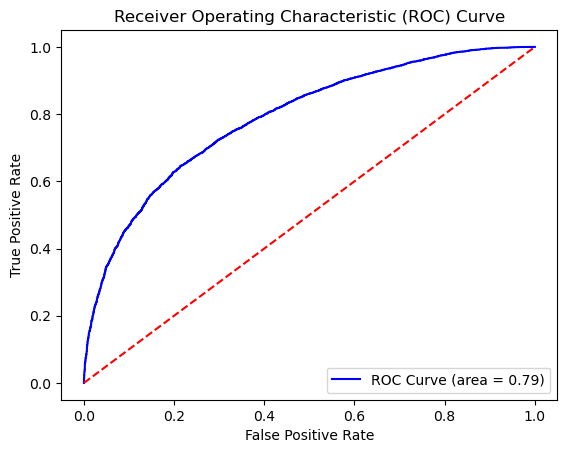

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

if len(np.unique(y_test)) == 2:  
    y_prob = models["Logistic Regression"].predict_proba(x_test)[:, 1] 

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
else:
    print("ROC curve is only applicable for binary classification.")
